In [1]:
import pandas as pd
import json
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns


# Read the categories

In [2]:
with open("ndsc-beginner\\categories.json", "r") as read_file:
    categories = json.load(read_file)

print (categories,'\n')

for big_label in categories:
    l = list(categories[big_label].values())
    l.sort()
    print (big_label,' has ',len(l), ' classes')
    print (l,'\n')




{'Mobile': {'Others Mobile & Tablet': 35, 'Smartfren': 53, 'Infinix': 40, 'Brandcode': 39, 'Icherry': 52, 'Advan': 45, 'Iphone': 31, 'Realme': 51, 'Motorola': 49, 'Maxtron': 56, 'Nokia': 38, 'Xiaomi': 34, 'Mito': 46, 'Sony': 33, 'SPC': 57, 'Lenovo': 37, 'Alcatel': 55, 'Samsung': 32, 'Vivo': 42, 'Evercoss': 44, 'Strawberry': 50, 'Blackberry': 36, 'Asus': 43, 'Honor': 54, 'Oppo': 41, 'Huawei': 47, 'Sharp': 48}, 'Fashion': {'Wedding Dress': 23, 'Shirt': 27, 'Casual Dress': 18, 'Maxi Dress': 20, 'Big Size Dress': 24, 'Bodycon Dress': 22, 'Party Dress': 19, 'Blouse\xa0': 26, 'Tshirt': 25, 'Crop Top ': 29, 'Tanktop': 28, 'Others': 17, 'A Line Dress': 21, 'Big Size Top': 30}, 'Beauty': {'Foundation': 1, 'Face Palette': 0, 'Concealer': 7, 'Lip Gloss': 14, 'Blush On': 2, 'Highlighter': 8, 'BB & CC Cream': 5, 'Other Face Cosmetics': 4, 'Lip Tint': 13, 'Bronzer': 11, 'Lip Liner': 15, 'Powder': 3, 'Setting Spray': 10, 'Primer': 9, 'Contour': 6, 'Other Lip Cosmetics': 16, 'Lipstick': 12}} 

Mobile 

In [3]:
# Build mapper, from number to categories and big labels

num2categories = {}
for l1 in categories:
    for l2 in categories[l1]:
        num2categories[categories[l1][l2]] = l2
        #print (categories[l1][l2], ' ', l2)

num2biglabel = {}
for i in (range(0,17)):
    num2biglabel[i]='Beauty'
for i in (range(17,31)):
    num2biglabel[i]='Fashion'
for i in (range(31,58)):
    num2biglabel[i]='Mobile'

# Read the data

In [4]:
data = pd.read_csv("ndsc-beginner\\train.csv")

counter = Counter(data['Category'])
count = list(counter.items())
print ('Tuples of Category and Count')
print (count)


Tuples of Category and Count
[(0, 3772), (1, 28670), (2, 11544), (3, 81250), (4, 42688), (5, 55279), (6, 2047), (7, 11668), (8, 6048), (9, 8106), (10, 1077), (11, 4108), (12, 21782), (13, 2982), (14, 2735), (15, 599), (16, 2228), (17, 2765), (18, 56598), (19, 13493), (20, 19978), (21, 10483), (22, 15225), (23, 1671), (24, 4251), (25, 33922), (26, 33845), (27, 16199), (28, 6493), (29, 3338), (30, 1441), (31, 27836), (32, 29754), (33, 4821), (34, 14718), (35, 30590), (36, 1028), (37, 2272), (38, 4703), (39, 697), (40, 327), (41, 19312), (42, 10502), (43, 6147), (44, 920), (45, 2195), (46, 684), (47, 945), (48, 416), (49, 573), (50, 282), (51, 404), (52, 117), (53, 418), (54, 300), (55, 151), (56, 170), (57, 48)]


In [48]:
[str('{}-{:>25} {:>6}'.format(i,num2categories[i],v)) for i,v in count]

['0-             Face Palette   3772',
 '1-               Foundation  28670',
 '2-                 Blush On  11544',
 '3-                   Powder  81250',
 '4-     Other Face Cosmetics  42688',
 '5-            BB & CC Cream  55279',
 '6-                  Contour   2047',
 '7-                Concealer  11668',
 '8-              Highlighter   6048',
 '9-                   Primer   8106',
 '10-            Setting Spray   1077',
 '11-                  Bronzer   4108',
 '12-                 Lipstick  21782',
 '13-                 Lip Tint   2982',
 '14-                Lip Gloss   2735',
 '15-                Lip Liner    599',
 '16-      Other Lip Cosmetics   2228',
 '17-                   Others   2765',
 '18-             Casual Dress  56598',
 '19-              Party Dress  13493',
 '20-               Maxi Dress  19978',
 '21-             A Line Dress  10483',
 '22-            Bodycon Dress  15225',
 '23-            Wedding Dress   1671',
 '24-           Big Size Dress   4251',
 '25-     

   Num  Count BigLabel
0    0   3772   Beauty
1    1  28670   Beauty
2    2  11544   Beauty
3    3  81250   Beauty
4    4  42688   Beauty


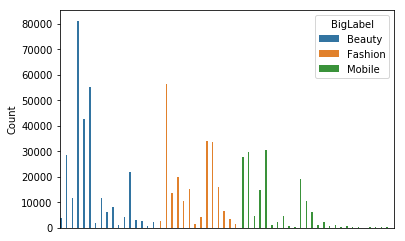

In [12]:
data2 = pd.DataFrame(count,columns=['Num','Count'])
                     
data2['BigLabel'] = list(map(lambda x:num2biglabel[x],data2['Num']))
#print (data2.head())

ax = sns.barplot(x='Num',y='Count',hue='BigLabel', data=data2)
ax.set(xticks=[]); ax.set(xlabel="")
plt.show()

In [34]:
n_Beauty = sum(n for _,n in count[0:17])
n_Fashion = sum(n for _,n in count[17:31])
n_Mobile = sum(n for _,n in count[31:])

print (n_Beauty);print (n_Fashion);print (n_Mobile);

286583
219702
160330
